# Analyzing the Amount of Theft in Greater Vancouver Before and During the Pandemic (2020-2021) 

## Introduction


By June 2020, unemployment rates rose to 13.5% in Vancouver according to the Vancouver Economic Commission. As reported by Raphael and Rudolf, unemployment is an essential indicator of property crime rates. An interesting finding is that when unemployment increases by 1%, property crime is predicted to rise by 2% (Lin, 2008 as cited in Freeman, 1995). The surge in unemployment due to the COVID-19 pandemic would lead to decreased disposable income and the ability to provide for oneself. Therefore, we believe there may be an increase in economic crimes because of the lack of income. Our analysis intends to test if the phenomenon mentioned above is present in Vancouver, British Columbia.

The dataset used for our research, “Vancouver Crime Data”, from the Vancouver Police Department's (VPD) Open Crime Data includes the “type” of crime (a dependent variable) and “month” (an independent variable). We will contrast the mean monthly occurrences of economic criminal activities before and during the pandemic. 

The “economic crimes” being taken into consideration for this investigation are the following: 

1) Theft FROM vehicle, 2) Theft OF vehicle, 3) Bicycle theft, 4) Other theft

Our aim is to find out whether the mean economic crime rate is greater during the pandemic years (2020-2021) than the pre-pandemic years (2018-2019). We will use the mean as a measure of centrality given the large size of the chosen dataset. Additionally, we will also use standard deviation to measure and account for variability. 



## Methods and Results

#### Importing Libraries

In [ ]:
# Load required packages.
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(testthat)
library(ggplot2)
library(hms)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




#### Importing the Data

We decided to split the data into two:
1) Pre-pandemic crime data 2) Pandemic crime data

Each dataset contains the number of crime cases over a 24 month period as the pandemic only occurred in a roughly 24 month time span. We split the data into two to improve organization and visualization of the data, allowing us to creating two different histograms for better comparisions. 

In [ ]:
#Load pandemic and prepandemic data
url1 <- "https://raw.githubusercontent.com/yingquanw/STAT201_project_group35/main/crimedata_pandemic.csv"
van_crime_data_pandemic <- read_csv(url1)
url2 <- "https://raw.githubusercontent.com/yingquanw/STAT201_project_group35/main/crimedata_prepandemic.csv"
van_crime_data_prepandemic <- read_csv(url2)
head(van_crime_data_pandemic)
head(van_crime_data_prepandemic)

Rows: 69679 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 92527 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2020,6,19,3,40,10XX ALBERNI ST,West End,491059.5,5459122
Break and Enter Commercial,2020,1,3,6,43,10XX ALBERNI ST,West End,491068.7,5459126
Break and Enter Commercial,2020,9,27,20,0,10XX ALBERNI ST,West End,491073.1,5459109
Break and Enter Commercial,2020,6,28,6,50,10XX ALBERNI ST,West End,491102.2,5459092
Break and Enter Commercial,2020,2,5,0,0,10XX BEACH AVE,West End,490227.2,5458210
Break and Enter Commercial,2020,2,11,13,35,10XX BEACH AVE,West End,490227.2,5458210


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2018,6,16,18,0,10XX ALBERNI ST,West End,491102.2,5459092
Break and Enter Commercial,2018,12,12,0,0,10XX BEACH AVE,West End,490228.8,5458208
Break and Enter Commercial,2018,4,9,6,0,10XX BEACH AVE,Central Business District,490249.2,5458167
Break and Enter Commercial,2018,10,2,18,31,10XX BEACH AVE,Central Business District,490258.4,5458155
Break and Enter Commercial,2018,2,17,15,0,10XX BEACH AVE,Central Business District,490269.9,5458141
Break and Enter Commercial,2018,5,16,17,0,10XX BOUNDARY RD,Hastings-Sunrise,498275.6,5458125


#### Cleaning the Data

We are only studying "economic crimes" as mentioned above so we will filter the data set for theft crimes only. 

In [ ]:
#Filtering the pandemic data
van_crime_pandemic_clean <- van_crime_data_pandemic %>%
    select(TYPE, YEAR, MONTH)%>%
     filter(TYPE == c("Other Theft","Theft from Vehicle","Theft of Bicycle","Theft of Vehicle"))

#Printing out the data 
head(van_crime_pandemic_clean)

#Filtering the pre-pandemic data
van_crime_prepandemic_clean <- van_crime_data_prepandemic %>%
    select(TYPE, YEAR, MONTH)%>%
         filter(TYPE == c("Other Theft","Theft from Vehicle","Theft of Bicycle","Theft of Vehicle"))

#Printing out the data 
head(van_crime_prepandemic_clean)

Warning message in TYPE == c("Other Theft", "Theft from Vehicle", "Theft of Bicycle", :
“longer object length is not a multiple of shorter object length”


TYPE,YEAR,MONTH
<chr>,<dbl>,<dbl>
Other Theft,2020,2
Other Theft,2020,11
Other Theft,2020,3
Other Theft,2020,6
Other Theft,2020,9
Other Theft,2020,11


Warning message in TYPE == c("Other Theft", "Theft from Vehicle", "Theft of Bicycle", :
“longer object length is not a multiple of shorter object length”


TYPE,YEAR,MONTH
<chr>,<dbl>,<dbl>
Other Theft,2018,1
Other Theft,2018,12
Other Theft,2018,3
Other Theft,2018,8
Other Theft,2018,10
Other Theft,2018,4


#### Grouping the number of crime cases each month 

We chose to group the cases by months as it gave us the best overview of case numbers with 24 observations. Grouping by years only would have given us 2 observations and grouping by days would have resulted in over 600+ observations. 

Grouping the number of crime cases during the pandemic:

In [ ]:
# Number of crimes each month in pandemic time
van_crime_pandemic_month <- van_crime_pandemic_clean %>% 
group_by(MONTH) %>%
summarize(numOfCases = n())

#Printing out the data 
head(van_crime_pandemic_month)

MONTH,numOfCases
<dbl>,<int>
1,1063
2,961
3,897
4,730
5,692
6,711


Grouping the number of crime cases before the pandemic:

In [ ]:
# Number of crimes each month in prepandemic time
van_crime_prepandemic_month <- van_crime_prepandemic_clean %>% 
group_by(MONTH) %>%
summarize(numOfCases = n() )

#Printing out the data 
head(van_crime_prepandemic_month)

MONTH,numOfCases
<dbl>,<int>
1,1345
2,1003
3,1224
4,1283
5,1316
6,1279


#### Visualizing the data in a histogram

To better observe the differences, we decided to generate histograms for the each of the two data sets and compare them side by side. 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


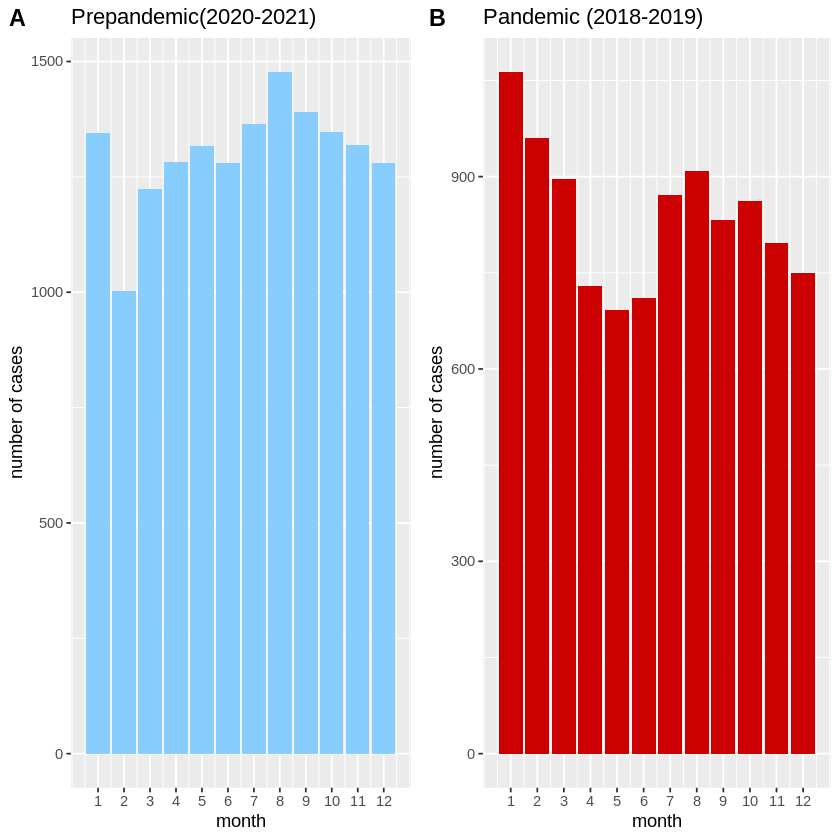

In [ ]:
# Visualization of the pandemic crime counts for each month
pandemic_crime_dist <- ggplot(van_crime_pandemic_month, aes(x = MONTH, y = numOfCases), binthwidth = 2) +
  geom_histogram(stat = "identity",  fill = "red3") +
  xlab("month") +
  ylab("number of cases") +
  ggtitle("Pandemic (2018-2019)")+
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

# Visualization of the pre-pandemic crime counts for each month
prepandemic_crime_dist <- ggplot(van_crime_prepandemic_month, aes(x = MONTH, y = numOfCases), binthwidth = 2) +
  geom_histogram(stat = "identity",  fill = "skyblue1") +
  xlab("month") +
  ylab("number of cases") +
  ggtitle("Prepandemic(2020-2021)")+
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

# Displaying the two charts side by side
plot_grid(prepandemic_crime_dist, pandemic_crime_dist, labels = "AUTO")

Figure 1: It appears from comparing the histograms that the criminal cases during the pre-pandemic time are greater than the cases during the pandemic.

#### Calculating the Point Estimates

Although a visual comparison is helpful, gauging by eye is not always the most helpful or accurate, this we will calculate a point estimate of the data sets as well. We are using the mean to observe if the typical theft crime rate is less than the pre-pandemic years. 

In [ ]:
# Merging pre-pandemic month with months during the pandemic
prep_pan_cases <- merge(van_crime_prepandemic_month, van_crime_pandemic_month, by = "MONTH")

# Calculating the point estimate (mean)
point_estimate <- prep_pan_cases %>%
    mutate(difference = numOfCases.y - numOfCases.x) %>%
    summarize(mean_difference = mean(difference))

# Printing out the point estimate
point_estimate

mean_difference
<dbl>
-462.9167


We got a difference in mean value of -462.9167, this means that on average, pandemic economic crimes cases were down by 462 compared to the number of economic crime cases pre-pandemic.

## Our Hypothesis 

Null hypothesis:  The mean crime rate of “economic crimes” during the pandemic (2020-2021) is the same as the pre-pandemic time (2018-2019) in Vancouver

$H0$: $\mu$(during) - $\mu$(pre) = $0$

Alternative hypothesis: The mean crime rate of “economic” crimes decreases during the months of pandemic (2020-2021) than the pre-pandemic years(2018-2019) in Vancouver.

$H1$: $\mu$(during) - $\mu$(pre) < $0$

Same as per the convention, we will set the confidence level to 95%. ($α$ = 0.05). We'll use the bootstrapping approach and theoretical approach (t-test) to test our hypothesis to get a reliable result.

The bootstrapping method is more appropriate for our hypothesis test because our sample does not satisfy the requirement of using CLT. 1) We don’t know if the population is normally distributed. 2) The sample size of 12 is not large enough (Typically, a sample with 30 or more observations is large enough) Thus, using theoretical approach does not guarantee us to get an accurate result. But for the sake of comparison, we did them both.

## 1) Theoretical approach (t-test)

We decided to conduct two-sample (independent) t-test here because we want to examine is there any difference between the crime cases in months before the pandemic and during the pandemic. They should be independent of each other.

For two-sample (independent) t-test: <br>


Test statistic: 
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$

Degrees of freedom: 
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$

We don't know if the population is normally distributed, and sample size of 12 is probably a little bit small. However, we decide to do it as we are going the compare this to the bootstrapping approach. Since we are using the t-test function from infer package, we don't need to calculate test statistic and degrees of freedom manually.

In [ ]:
#conducting the t-test
test_result <- 
    tidy(
        t.test(x = van_crime_pandemic_month$numOfCases,
               y = van_crime_prepandemic_month$numOfCases,
               alternative = "less")) 

test_result

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-462.9167,839.4167,1302.333,-10.08633,5.216889e-10,21.97699,-Inf,-384.104,Welch Two Sample t-test,less


### 95% Confidence Interval:

We decided to go with a confidence interval of 95% as we have set our significant level to 0.05. 

#### Why we chose a significance level of 0.05

A significance level of 0.05 is a very reliable standard in statistics for significance, so we will go with that.


In [ ]:
n <- 12
# calculating the standard deviation of pre and during pandemic
sd_pre <- sd(van_crime_prepandemic_month$numOfCases)
sd_during <- sd(van_crime_pandemic_month$numOfCases)
# calculating the standard error
std_error_diff_btw_means <- sqrt(sd_pre^2/n + sd_during^2/n)

# Calculating the confidence interval
diff_btw_means_ci <-
    tibble(
        lower_ci = qnorm(0.025, mean = 0, sd = std_error_diff_btw_means),
        upper_ci = qnorm(0.975, mean = 0, sd = std_error_diff_btw_means)
    )
diff_btw_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
-89.9534,89.9534


##### //TODO someone elaborate on this
Actual difference: -462.9167

#### Calculating the P-value:

In [ ]:
# Extracting the p-value from the t-test results
pvalue <- test_result$p.value
pvalue

[1] 5.216889e-10

We have P-value = 5.21688868219865e-10 which is significantly smaller than our significance level of 0.05. Since P-value is less than $α$, we reject the null hypothesis base on the result of two-sample t-test.

## 2) Bootstrapping approach 

We are also bootstrapping because we do not have access to the entire population and we want to create a simulation that represents the population as closely as possible. We will simulate samples using the empirical distribution to get a good idea about the population distribution.

In [ ]:
#Changing the name of categories within time variable
pre <- van_crime_prepandemic_month %>% 
mutate(time = "pre")

during <- van_crime_pandemic_month %>% 
mutate(time = "during")

#Putting the times altogether
all_crime <- bind_rows(pre, during)

head(all_crime)

MONTH,numOfCases,time
<dbl>,<int>,<chr>
1,1345,pre
2,1003,pre
3,1224,pre
4,1283,pre
5,1316,pre
6,1279,pre


We set reps = 5000, same as what we had in worksheets and tutorials.

In [ ]:
# Generating a null model for the bootstrap
null_model <- 
   all_crime %>% 
   specify(formula = numOfCases ~ time) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 5000, type = "permute") %>%  
   calculate(stat="diff in means", order = c("during", "pre"))

### 95% confidence interval:

lower_ci,upper_ci
<dbl>,<dbl>
-207.5833,210.925


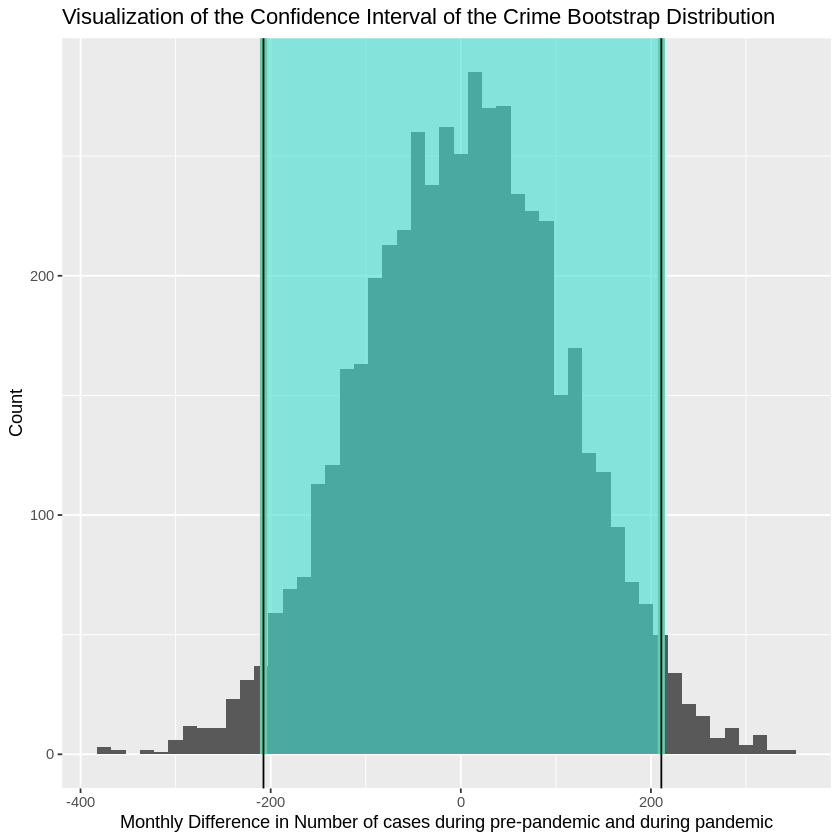

In [ ]:
#Calculating the confidence interval for the bootstrap approach
diff_btw_means_ci <- null_model %>%
get_confidence_interval(level = 0.95, type = "percentile")
diff_btw_means_ci

#Adding a visualization for the confidence interval
bootstrap_ci_plot <- null_model %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 15) +
    ggtitle("Visualization of the Confidence Interval of the Crime Bootstrap Distribution") +
    xlab("Monthly Difference in Number of cases during pre-pandemic and during pandemic") +
    ylab("Count") +
    shade_confidence_interval(endpoints = diff_btw_means_ci) +
    geom_vline(xintercept = diff_btw_means_ci[[1]]) +
    geom_vline(xintercept = diff_btw_means_ci[[2]])

bootstrap_ci_plot

Figure 2 highlights that 95% of difference in case numbers lie between -200 and 200.

#### TODO
Actual difference: -462.9167, therefore we would reject the null hypothesis.

#### Calculating the P-value:

In [ ]:
#Getting the p-value from the bootstrap
p_value <- null_model %>% 
  get_p_value(obs_stat = point_estimate, direction = "left")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


We get a p_value of 0, which is technically impossible mathematically. However, a p-value of 0 is possible according to the offical documentation of get_p_value function in the infer package. In this case, the true p-value is a small value likely less than 3/reps (based on a poisson approximation). 

Reference: https://www.rdocumentation.org/packages/infer/versions/1.0.3/topics/get_p_value

#### Why is there a difference in the p-value calculated between the theoretical and bootstrap approach?

// someone write here
    



#### Summary of results:
Point estimate: -462.9167

##### T-test (theoretical) method: 
95% confidence interval: -89.9534 to 89.9534<br>
P-value: 5.21688868219865e-10 <br>
#####  Bootstrapping method:
95% confidence interval: -211.7625 to 211.5875 <br>
P-value: very close to zero <br>

We reject null hypothesis using both methods.

## Results

Since the p-value we got in both approaches was less than our significance level (0.05), therefore, we will reject the null hypothesis which states that the mean crime rate of “economic crimes” during the pandemic (2020-2021) is the same as the pre-pandemic time (2018-2019) in Vancouver, based on the results from both the 1) theorical and 2) bootstrapping approach. 

This is a strong evidence to convince us to believe the mean crime rate of “economic” crimes decreases during the months of pandemic (2020-2021) than the pre-pandemic years(2018-2019) in Vancouver.

## Discussion

#### Findings

We found that the economic crime cases in Vancouver decreased during the pandemic (2020-2021) compared to the pre-pandemic time. The results from our analysis showed that economic crime cases in Vancouver decreased during the  COVID-19 pandemic (2020-2021) compared to pre-pandemic times. Our presumption is that the decline of out-of-home activities due to the government mandated lockdown outweighs the effects of surging unemployment, which, as stated before, is an incentive for crime. However, our research is more on the “correlational” side. Hence, we are not trying to explain what actually caused this change but rather it could act as a starting point for possible future causational research to find what causes this change. The result from this research helps us to better understand how various factors influence the frequency of economic crime. It could also be a starting point for other research about crime rates in Vancouver and other cities. 

#### Results Versus Expectations

We hypothesized that property crime would increase during the COVID-19 pandemic due to the rise of factors such as unemployment which according to studies previously mentioned, is an important indicator for property crime rates. However, the results from this analysis were opposite to what we were expecting. 

#### Future Questions

//

## References

Home - Vancouver Police Board. (n.d.). Retrieved November 4, 2022, from https://vancouverpoliceboard.ca/police/policeboard/agenda/2022/0421/R_7.2_2204P01_Q1-2022-PSI-Report-FINAL.pdf 

How covid-19 lockdowns affected crime in Vancouver. SFU Research. (n.d.). Retrieved November 4, 2022, from https://www.sfu.ca/research/scholarly-impacts/how-covid-19-lockdowns-affected-crime-vancouver?utm_source=Email_marketing&amp;utm_campaign=Wednesday_June_22_2022&amp;cmp=1&amp;utm_medium=HTMLEmail&amp;_ccCt=bvcv-2kdmjt-bqdx2f-iqazy6n6 

Lin, M.-J. (2008). Does Unemployment Increase Crime? Evidence from U.S. Data 1974-2000. The Journal of Human Resources, 43(2), 413–436. http://www.jstor.org/stable/40057352

RDocumentation: https://www.rdocumentation.org/packages/infer/versions/1.0.3/topics/get_p_value

VPD open data. (n.d.). Retrieved November 4, 2022, from https://geodash.vpd.ca/opendata/ 